### SQL - Sakila Database Analysis 
The goal of this project was to find answers for some data related questions using SQL.

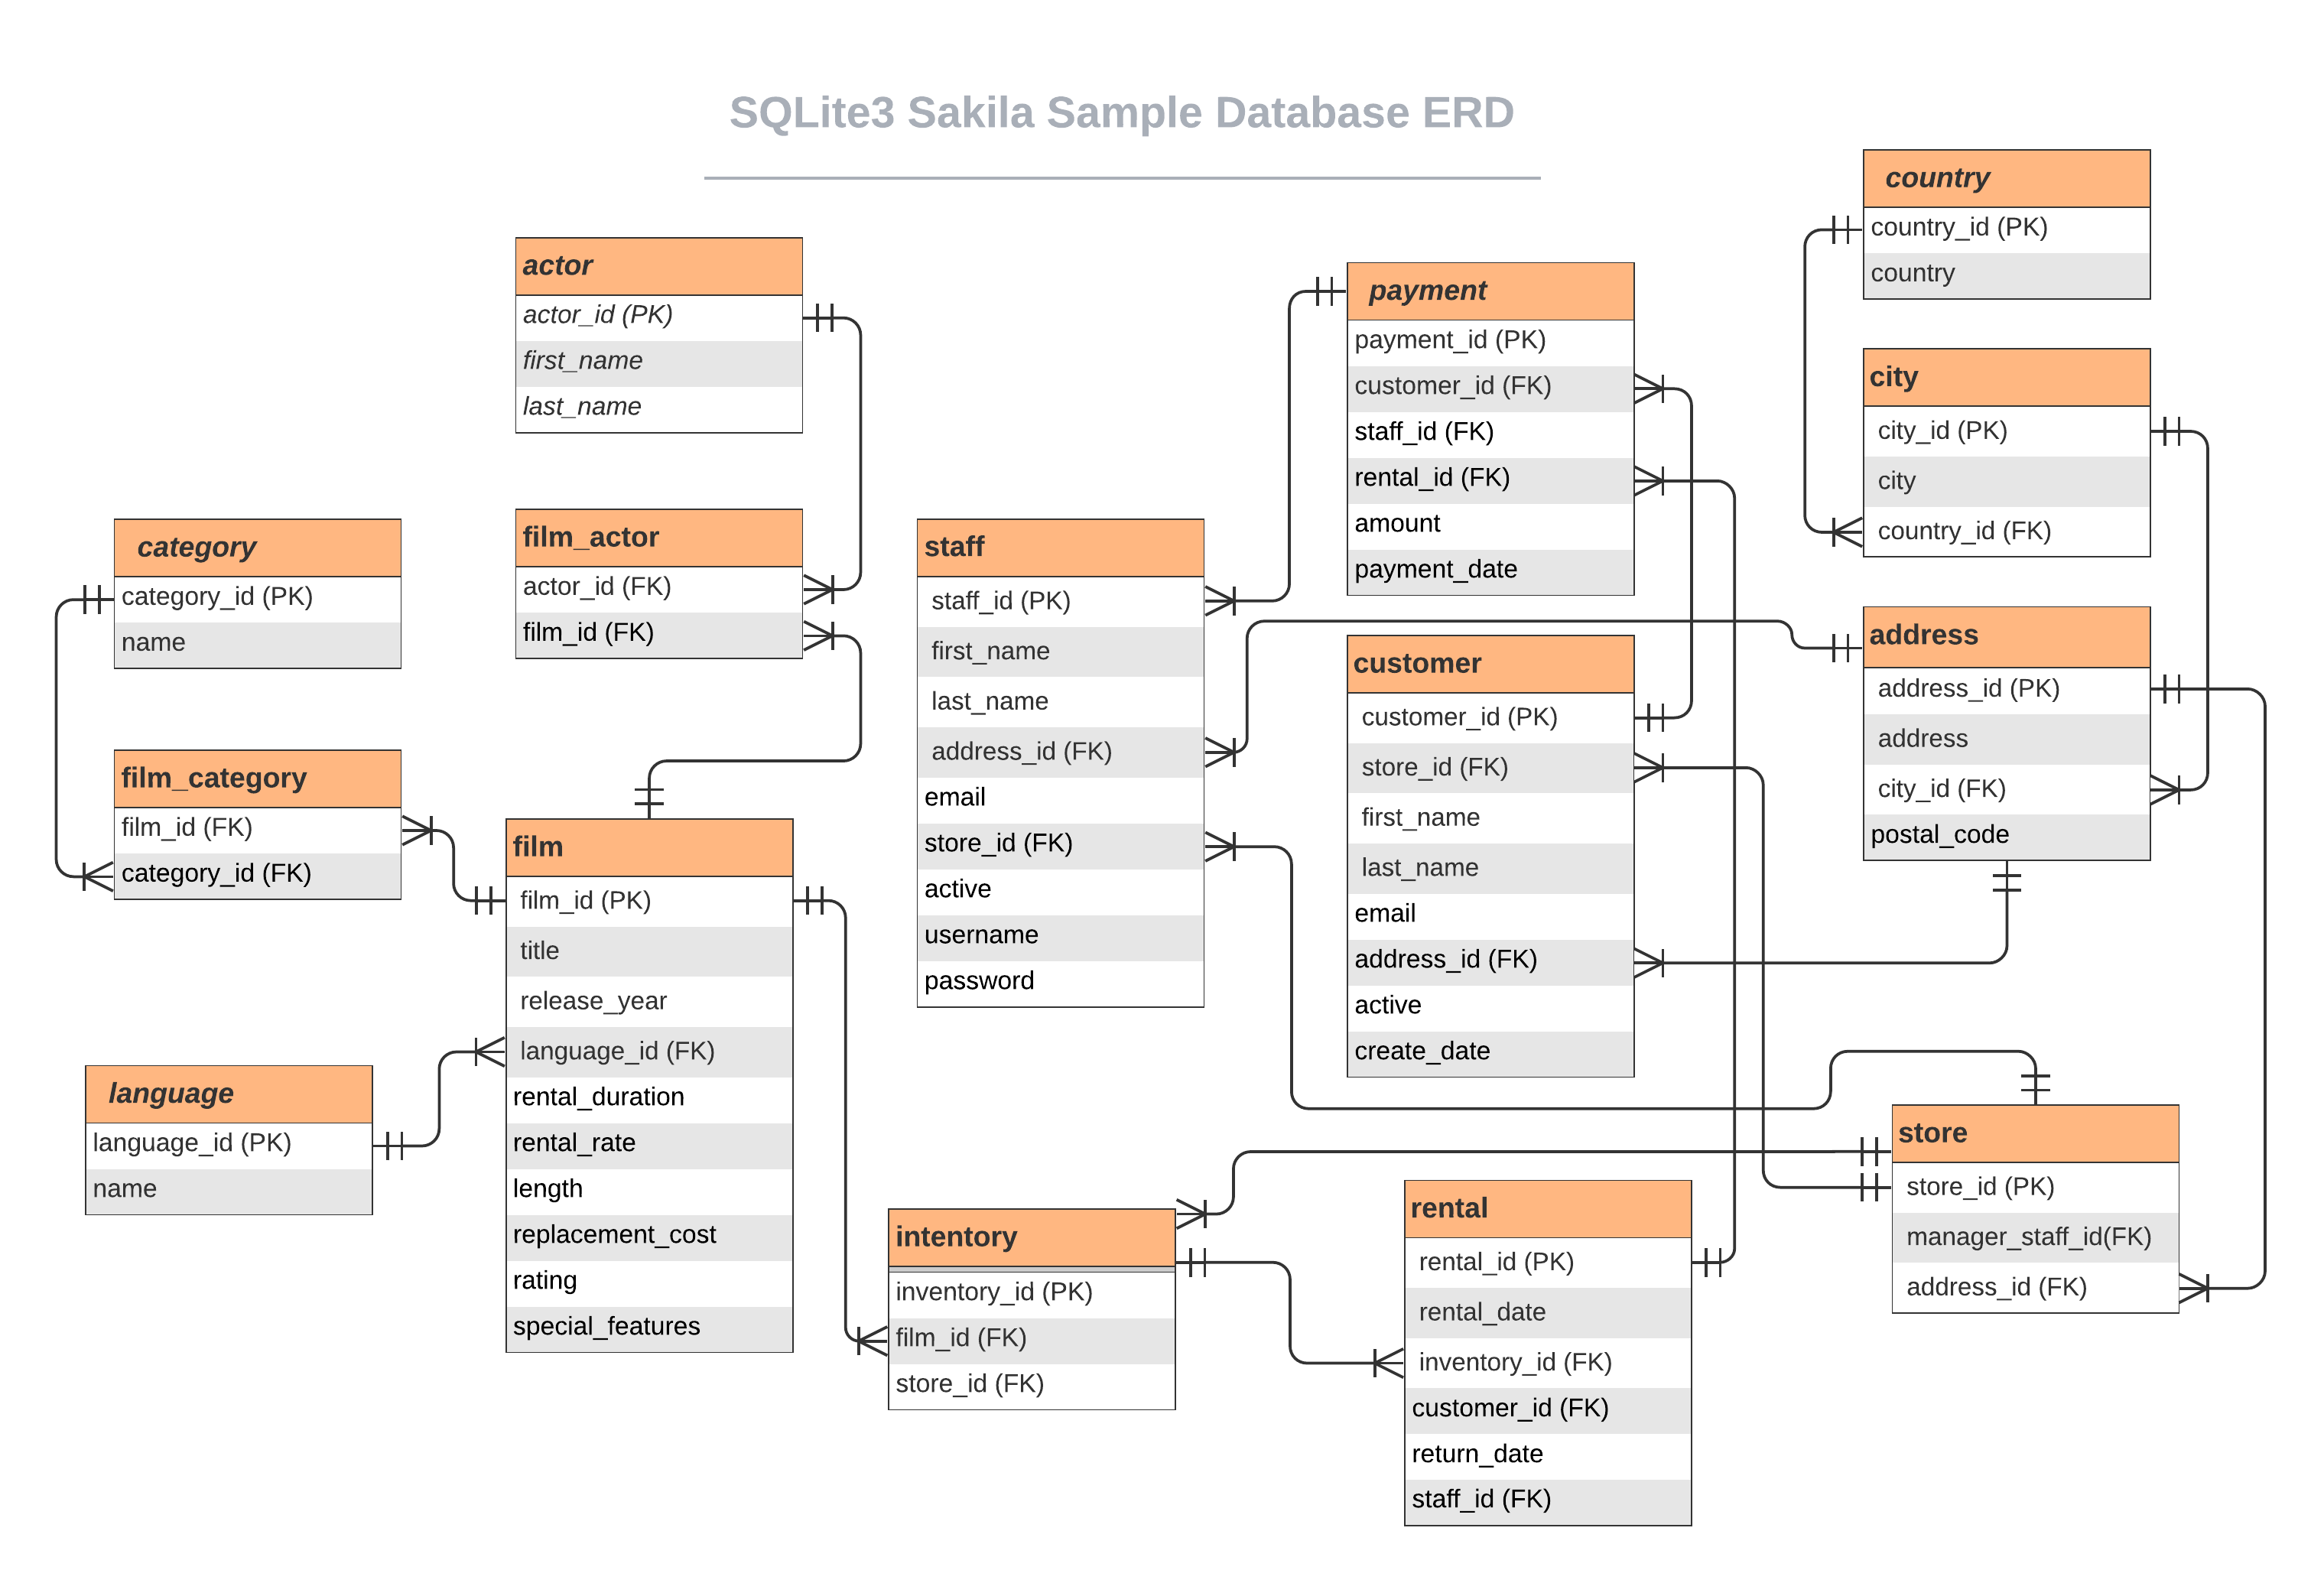

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
con = sqlite3.connect('./sakila/sqlite-sakila.db')
cur = con.cursor()
table_list = [a for a in cur.execute("SELECT name FROM sqlite_master WHERE type = 'table'")]
table_list

[('actor',),
 ('country',),
 ('city',),
 ('address',),
 ('language',),
 ('category',),
 ('customer',),
 ('film',),
 ('film_actor',),
 ('film_category',),
 ('film_text',),
 ('inventory',),
 ('staff',),
 ('store',),
 ('payment',),
 ('rental',)]

#### Which actors have the first name ‘Scarlett’?

In [3]:
pd.read_sql("""
SELECT * 
FROM actor
WHERE first_name LIKE 'Scarlett'
""", con)

,actor_id,first_name,last_name,last_update
0,81,SCARLETT,DAMON,2021-03-06 15:51:59
1,124,SCARLETT,BENING,2021-03-06 15:52:00


#### How many distinct actors last names are there?

In [4]:
pd.read_sql("""
SELECT 
    COUNT(DISTINCT last_name) AS num_of_distinct_last_names
FROM actor
""", con)

,num_of_distinct_last_names
0,121


#### Which last names are not repeated?

In [5]:
pd.read_sql("""
WITH last_names_count AS (
SELECT 
    last_name,
    COUNT(last_name) AS ln_count
FROM actor
GROUP BY last_name
)
SELECT 
    last_name
FROM last_names_count
WHERE ln_count = 1
""", con)

,last_name
0,ASTAIRE
1,BACALL
2,BALE
3,BALL
4,BARRYMORE
...,...
61,WALKEN
62,WAYNE
63,WILSON
64,WITHERSPOON


#### Which last names appear more than once?

In [6]:
pd.read_sql("""
WITH last_names_count AS (
SELECT 
    last_name,
    COUNT(last_name) AS ln_count
FROM actor
GROUP BY last_name
)
SELECT 
    last_name
FROM last_names_count
WHERE ln_count > 1
""", con)

,last_name
0,AKROYD
1,ALLEN
2,BAILEY
3,BENING
4,BERRY
5,BOLGER
6,BRODY
7,CAGE
8,CHASE
9,CRAWFORD


#### Which actor has appeared in the most films?

In [7]:
df1 = pd.read_sql("""
SELECT
    first_name,
    last_name,
    first_name || ' ' || last_name AS full_name,
    COUNT(film_id) AS num_of_appearances
FROM actor
JOIN film_actor
USING(actor_id)
GROUP BY actor_id
ORDER BY COUNT(film_id) DESC
LIMIT 10
""", con)
df1

,first_name,last_name,full_name,num_of_appearances
0,GINA,DEGENERES,GINA DEGENERES,42
1,WALTER,TORN,WALTER TORN,41
2,MARY,KEITEL,MARY KEITEL,40
3,MATTHEW,CARREY,MATTHEW CARREY,39
4,SANDRA,KILMER,SANDRA KILMER,37
5,SCARLETT,DAMON,SCARLETT DAMON,36
6,UMA,WOOD,UMA WOOD,35
7,VAL,BOLGER,VAL BOLGER,35
8,HENRY,BERRY,HENRY BERRY,35
9,GROUCHO,DUNST,GROUCHO DUNST,35


#### Is ‘Academy Dinosaur’ available for rent from Store 1?

In [9]:
pd.read_sql("""
SELECT 
    COUNT(*)
FROM inventory i
JOIN film f
USING(film_id)
WHERE title LIKE 'Academy Dinosaur'
AND store_id = 1
""", con)

,COUNT(*)
0,4


#### When is ‘Academy Dinosaur’ due?

In [10]:
pd.read_sql("""
SELECT 
    title,
    return_date
FROM inventory i
JOIN film f
USING(film_id)
JOIN rental r
USING(inventory_id)
WHERE title LIKE 'Academy Dinosaur'
""", con)

,title,return_date
0,ACADEMY DINOSAUR,2005-05-31 08:01:28.000
1,ACADEMY DINOSAUR,2005-06-06 00:36:07.000
2,ACADEMY DINOSAUR,2005-06-20 01:41:51.000
3,ACADEMY DINOSAUR,2005-06-23 17:45:00.000
4,ACADEMY DINOSAUR,2005-06-28 03:42:26.000
5,ACADEMY DINOSAUR,2005-07-11 06:25:31.000
6,ACADEMY DINOSAUR,2005-07-09 00:04:06.000
7,ACADEMY DINOSAUR,2005-07-11 21:29:15.000
8,ACADEMY DINOSAUR,2005-07-16 13:03:31.000
9,ACADEMY DINOSAUR,2005-08-01 04:08:11.000


#### What is that average running time of all the films in the sakila DB?

In [11]:
pd.read_sql("""
SELECT 
    AVG(length) avg_running_time
FROM film
""", con)

,avg_running_time
0,115.272


#### What is the average running time of films by category?

In [12]:
df2 = pd.read_sql("""
SELECT 
    name,
    AVG(length) avg_running_time
FROM film 
JOIN film_category
USING(film_id)
JOIN category
USING(category_id)
GROUP BY category_id
""", con)
df2

,name,avg_running_time
0,Action,111.609375
1,Animation,111.015152
2,Children,109.800000
3,Classics,111.666667
4,Comedy,115.827586
5,Documentary,108.750000
6,Drama,120.838710
7,Family,114.782609
8,Foreign,121.698630
9,Games,127.836066


#### How the number of rentals varies over time worldwide?

In [14]:
df3 = pd.read_sql("""
SELECT 
    DATE(rental_date) AS day,
    COUNT(rental_id) AS num_of_rentals
FROM rental
LEFT JOIN payment
USING(rental_id)
LEFT JOIN customer
USING(customer_id)
LEFT JOIN store
USING(store_id)
LEFT JOIN address
USING(address_id)
LEFT JOIN city
USING(city_id)
LEFT JOIN country
USING(country_id)
GROUP BY DATE(rental_date)
""", con)
df3

,day,num_of_rentals
0,2005-05-24,8
1,2005-05-25,137
2,2005-05-26,174
3,2005-05-27,166
4,2005-05-28,196
5,2005-05-29,154
6,2005-05-30,158
7,2005-05-31,163
8,2005-06-14,16
9,2005-06-15,348


#### What is the most popular film genre in each country?

In [15]:
pd.read_sql("""
WITH joined_tables AS (
    SELECT *
    FROM rental
    LEFT JOIN payment
    USING(rental_id)
    LEFT JOIN customer
    USING(customer_id)
    LEFT JOIN store
    USING(store_id)
    LEFT JOIN address
    USING(address_id)
    LEFT JOIN city
    USING(city_id)
    LEFT JOIN country
    USING(country_id)
    LEFT JOIN inventory
    USING(inventory_id)
    LEFT JOIN film
    USING(film_id)
    LEFT JOIN film_category
    USING(film_id)
    LEFT JOIN category
    USING(category_id)
),
grouped_by_category_and_country AS (
    SELECT
        country,
        name AS film_category,
        COUNT(rental_id) AS num_of_rentals
    FROM joined_tables
    GROUP BY country_id, category_id
),
top_category AS (
    SELECT 
        country,
        film_category,
        ROW_NUMBER() OVER(PARTITION BY country ORDER BY num_of_rentals DESC) AS ranking
    FROM grouped_by_category_and_country
)
SELECT 
        country,
        film_category
FROM top_category
WHERE ranking = 1    
""", con)

,country,film_category
0,Afghanistan,Comedy
1,Algeria,Sci-Fi
2,American Samoa,Sports
3,Angola,Animation
4,Anguilla,Travel
...,...,...
103,Vietnam,Drama
104,"Virgin Islands, U.S.",Animation
105,Yemen,Action
106,Yugoslavia,Animation


#### What is the average number of rentals per customer in each country? Limit to countries with at least 10 customers.

In [16]:
pd.read_sql("""
WITH joined_tables AS (
    SELECT *
    FROM rental
    LEFT JOIN payment
    USING(rental_id)
    LEFT JOIN customer
    USING(customer_id)
    LEFT JOIN store
    USING(store_id)
    LEFT JOIN address
    USING(address_id)
    LEFT JOIN city
    USING(city_id)
    LEFT JOIN country
    USING(country_id)
)
    SELECT
        country,
        COUNT(DISTINCT customer_id) AS num_of_customers,
        COUNT(rental_id) AS num_of_rentals,
        ROUND(CAST(COUNT(rental_id) AS FLOAT) / CAST(COUNT(DISTINCT customer_id) AS FLOAT), 2) AS average
    FROM joined_tables
    GROUP BY country_id
    HAVING num_of_customers >= 10
    ORDER BY average DESC

""", con)


,country,num_of_customers,num_of_rentals,average
0,Taiwan,10,305,30.50
1,Philippines,20,568,28.40
2,Nigeria,13,352,27.08
3,Argentina,13,352,27.08
4,China,53,1426,26.91
5,United States,36,968,26.89
6,Brazil,28,748,26.71
7,Japan,31,825,26.61
8,Mexico,30,796,26.53
9,Indonesia,14,367,26.21
